In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1232,1232,flat,pivotal riddhi siddhi,sector 99,0.72,7603.0,947.0,Carpet area: 706,2,2,...,NaN,706.0,0,0,1,0,0,0,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",31
3673,3673,flat,vipul lavanya,sector 81,0.75,1257.0,5966.0,Carpet area: 1257 (116.78 sq.m.),2,2,...,NaN,1257.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",37
575,575,flat,ashiana anmol,sohna road,0.90,1275.0,7059.0,Built Up area: 1275 (118.45 sq.m.)Carpet area:...,2,2,...,1275.0,1039.0,0,0,0,0,0,0,[],0
1267,1267,flat,godrej oasis,sector 88a,0.95,1307.0,7268.0,Carpet area: 1307 (121.42 sq.m.),2,2,...,NaN,1307.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",79
2080,2080,flat,vatika sovereign park,sector 99,2.45,2780.0,8812.0,Super Built up area 2780(258.27 sq.m.),3,4,...,NaN,NaN,0,1,0,0,0,2,"['Centrally Air Conditioned', 'Water purifier'...",165


In [4]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [5]:
df.sample(2)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
2033,flat,shapoorji pallonji joyville gurugram,sector 102,1.6,1368.0,11700.0,Built Up area: 1368 (127.09 sq.m.),2,2,3,...,1368.0,NaN,0,0,0,0,0,0,[],0
2471,flat,alpha corp gurgaonone,sector 84,2.2,3434.0,6406.0,Super Built up area 3434(319.03 sq.m.),4,4,3+,...,NaN,NaN,0,1,0,0,0,0,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",97


In [6]:
df.shape

(3803, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   Area                 3785 non-null   float64
 5   price_per_sqft       3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  additionalRoom       3803 non-null   object 
 11  floorNum             3786 non-null   float64
 12  facing               3545 non-null   object 
 13  agePossession        3803 non-null   object 
 14  nearbyLocations      3626 non-null   object 
 15  furnishDetails       2822 non-null   o

In [8]:
df.duplicated().sum()

122

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.head(2)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61


## property_type	

<Axes: xlabel='property_type'>

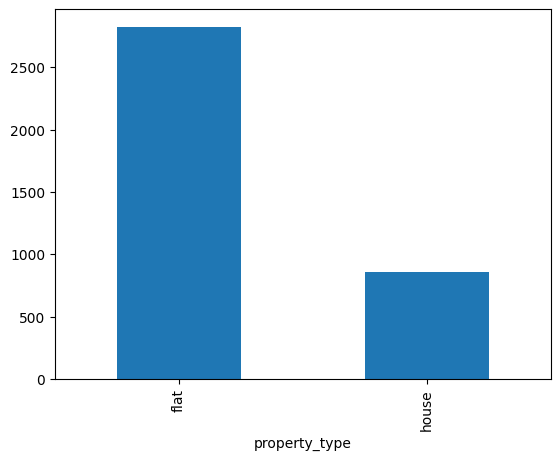

In [11]:
df['property_type'].value_counts().plot(kind='bar')

#### Observation

- Flats are in majority(75 percent) and there are less number of houses(25 percent)

- No missing values 

# Society

In [12]:
df['society'].value_counts().shape

(676,)

In [13]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
m3m antalya hills                         1
the center court                          1
ss omnia                                  1
bhim nagar society                        1
mrg skyline                               1
Name: count, Length: 676, dtype: int64

In [14]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023482
ss the leaf                             0.046337
dlf new town heights                    0.059487
shapoorji pallonji joyville gurugram    0.072636
signature global park                   0.083594
                                          ...   
umang monsoon breeze                    0.490294
ansal heights 86                        0.494364
puri emerald bay                        0.498435
ramsons kshitij                         0.502505
unitech uniworld resorts                0.506262
Name: proportion, Length: 75, dtype: float64

In [15]:
society_counts = df['society'].value_counts()

# frequenct distribution for society

frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()

}

In [16]:
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

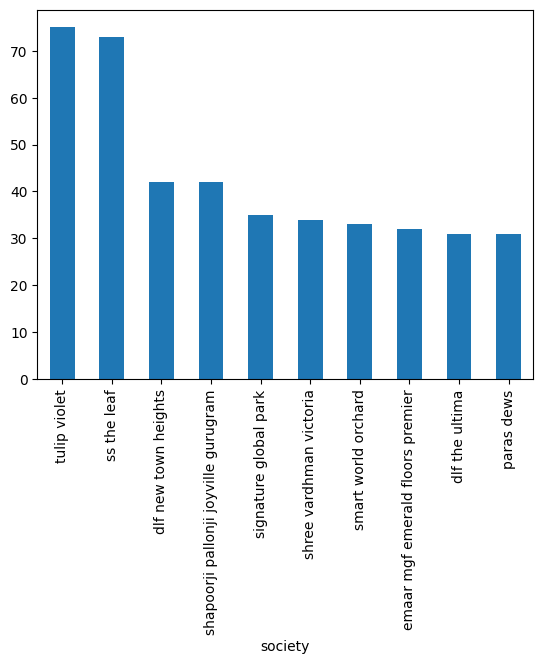

In [17]:
# top 10 societies 

df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [18]:
df['society'].isnull().sum()

1

In [19]:
df[df['society'].isnull()]

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
141,flat,NaN,sector 78,0.6,1625.0,3692.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,1625.0,NaN,0,0,0,0,0,0,[],0


#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [20]:
df.head(1)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71


In [21]:
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

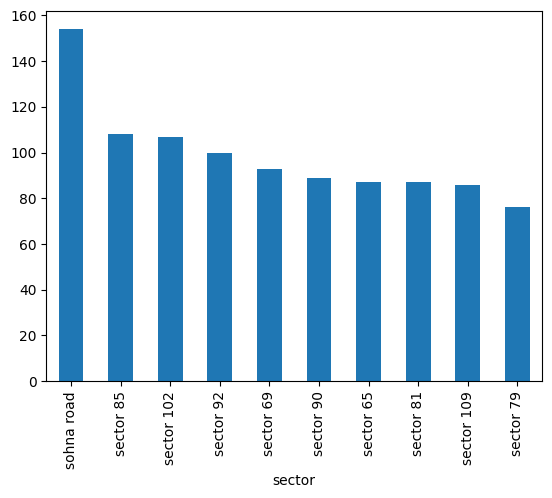

In [22]:
# top 10 sectors

df['sector'].value_counts().head(10).plot(kind= 'bar')

In [23]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

## Price

In [24]:
df['price'].isnull().sum()

17

In [25]:
df['price'].describe()

count    3664.000000
mean        2.533248
std         2.979058
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

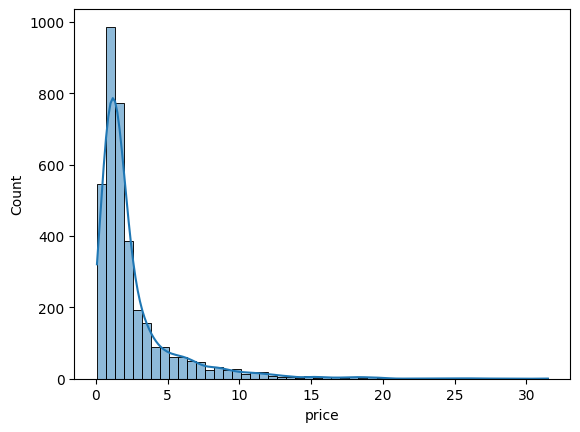

In [26]:
sns.histplot(df['price'],kde= True, bins= 50)

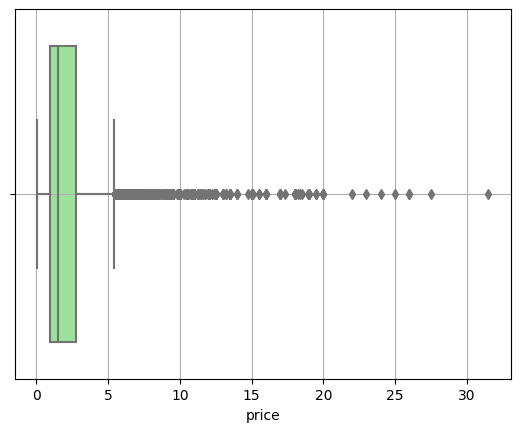

In [27]:
sns.boxplot(x= df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [28]:
# Skewness and Kurtosis

skewness = df['price'].skew()

kurtosis = df['price'].kurt()

In [29]:
print(skewness,kurtosis)

3.281159259029438 14.953293987087473


Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [30]:
# Quantiles Analysis
 
qunatiles = df['price'].quantile([0.01,0.05,0.95,0.99])

qunatiles


0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.248
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [31]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [33]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 28)

In [34]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

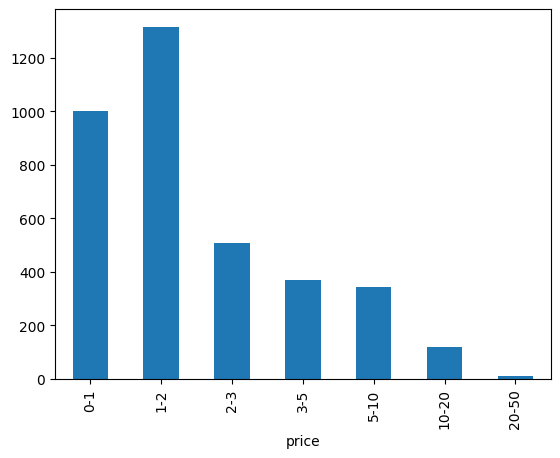

In [35]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

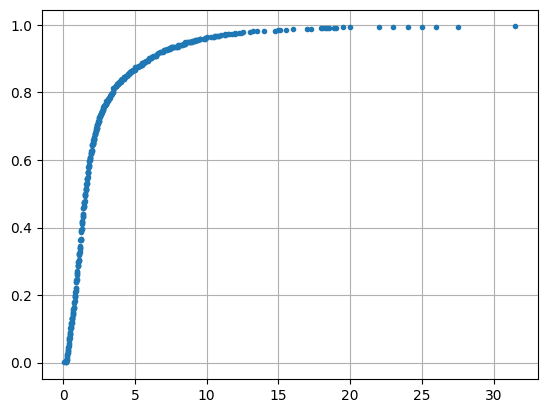

In [39]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

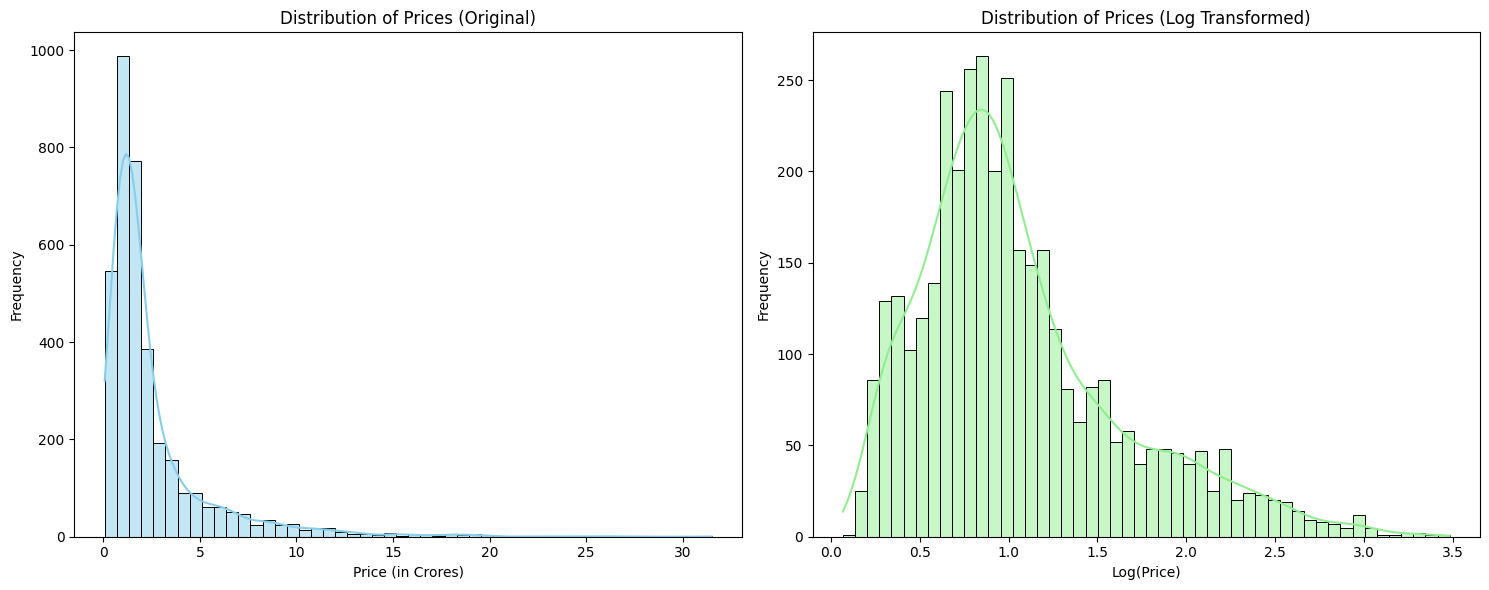

In [36]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [37]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740656509013655 0.9676010482364168


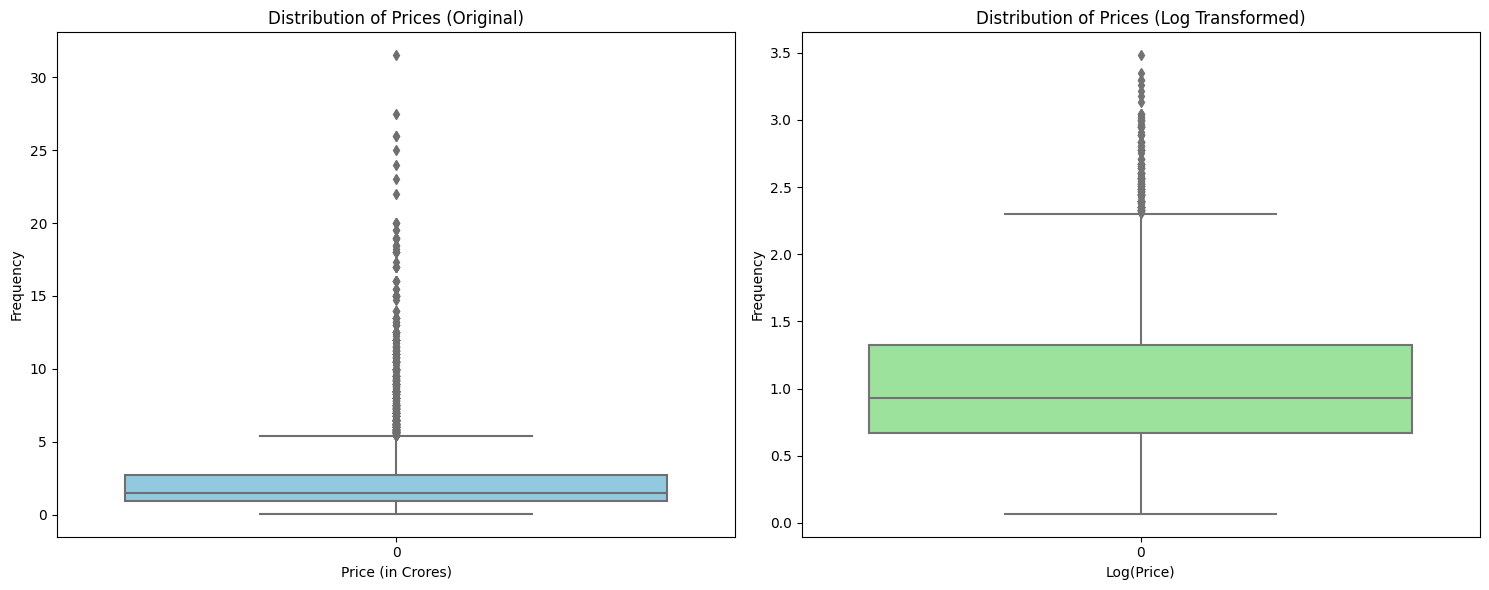

In [38]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [39]:
df['price_per_sqft'].isnull().sum()

17

In [40]:
df['price_per_sqft'].describe()

count      3664.000000
mean      13895.281114
std       23197.757961
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

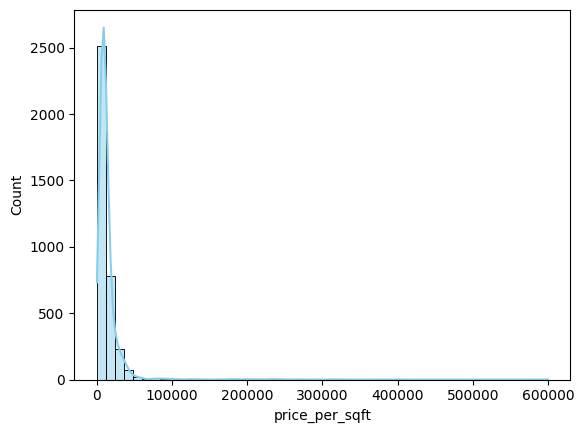

In [41]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

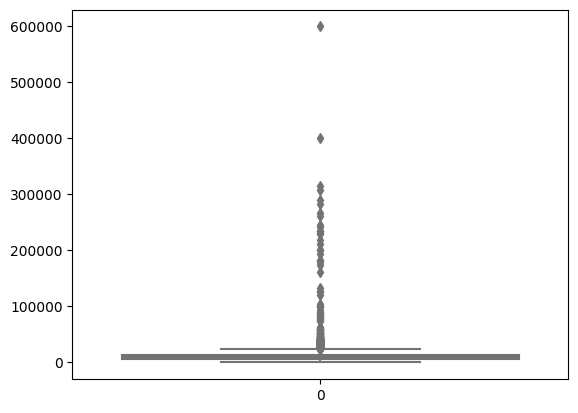

In [42]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

### bedRoom

In [43]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

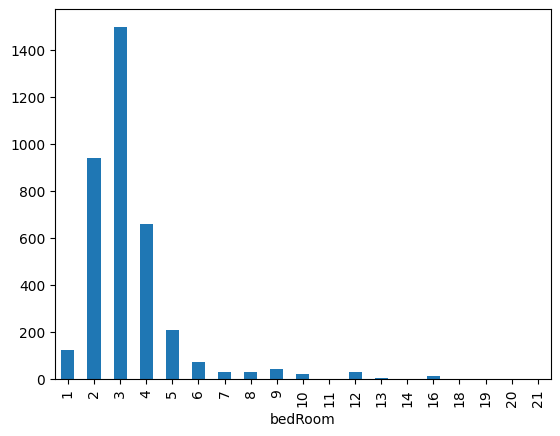

In [44]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

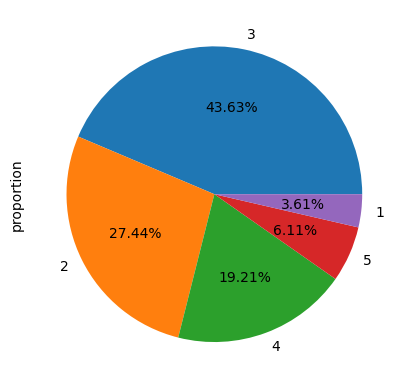

In [45]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [46]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

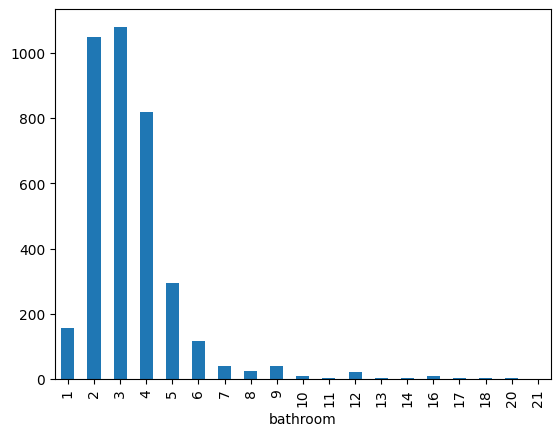

In [47]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

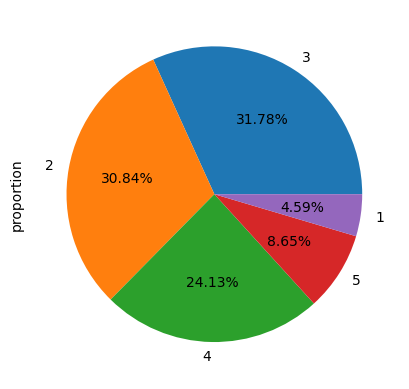

In [48]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [49]:
df.head()

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,...,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,...,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


### balcony

In [50]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

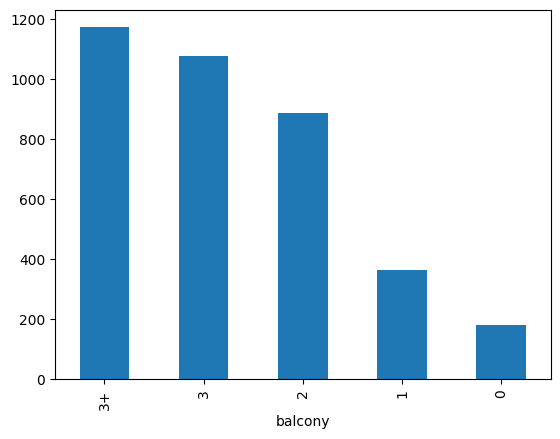

In [51]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

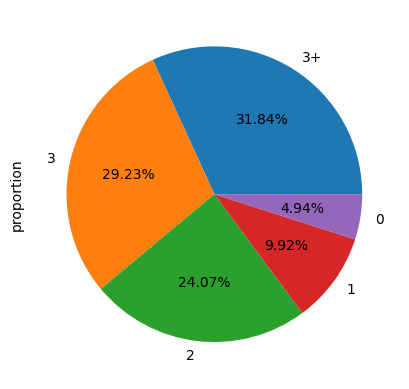

In [52]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum

In [53]:
df.iloc[:,10:].head()

,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1789.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",NaN,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",NaN,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [54]:
df['floorNum'].isnull().sum()

17

In [55]:
df['floorNum'].describe()

count    3664.000000
mean        6.794760
std         6.017394
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

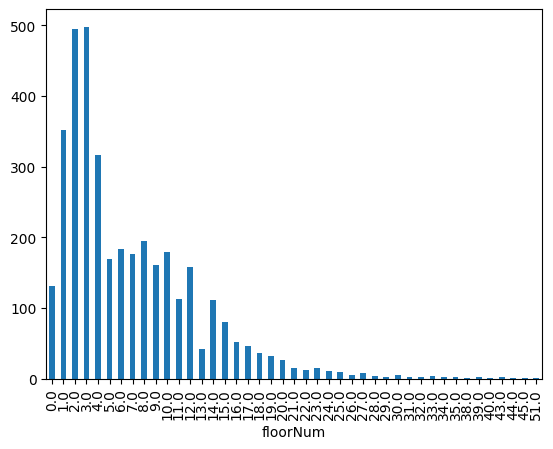

In [56]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

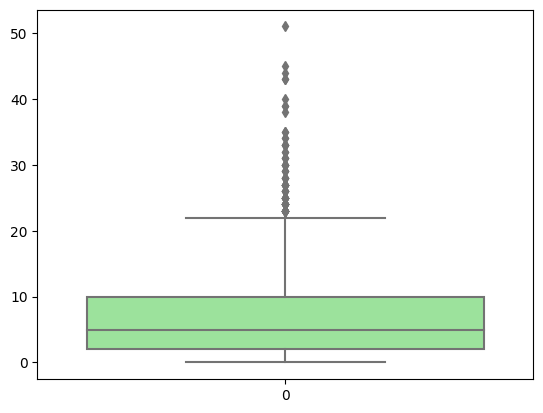

In [57]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [58]:
df['facing'].isnull().sum()

258

In [59]:
df['facing'].fillna('NA',inplace=True)

In [60]:
df['facing'].value_counts()

facing
Na            790
East          624
North-East    623
North         387
NA            258
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: count, dtype: int64

### agePossession


In [61]:
df['agePossession'].isnull().sum()

0

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately old         563
Undefined              447
Old Property           303
Under Construction     127
undefined                1
Name: count, dtype: int64

### areas


In [63]:
# super built up area
df['super_built_up_area'].isnull().sum()

1805

In [64]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

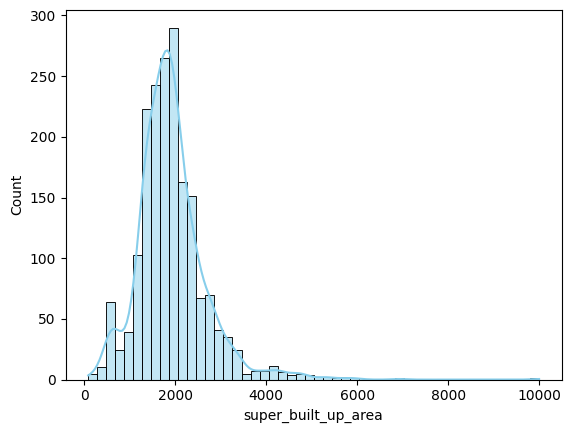

In [65]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

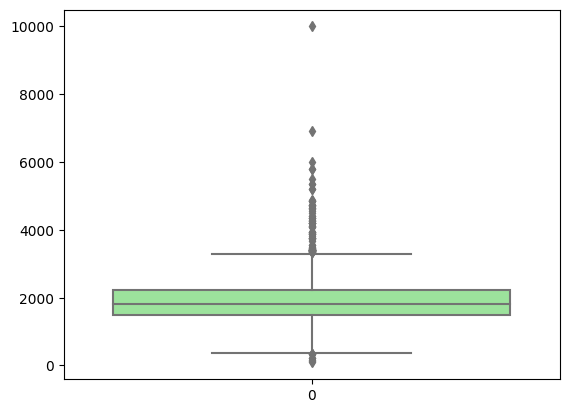

In [66]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [68]:
# built up area
df['built_up_area'].isnull().sum()

1989

In [69]:
df['built_up_area'].describe()

count      1692.000000
mean       1841.591625
std       17934.761883
min           2.000000
25%         360.000000
50%        1259.500000
75%        1900.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

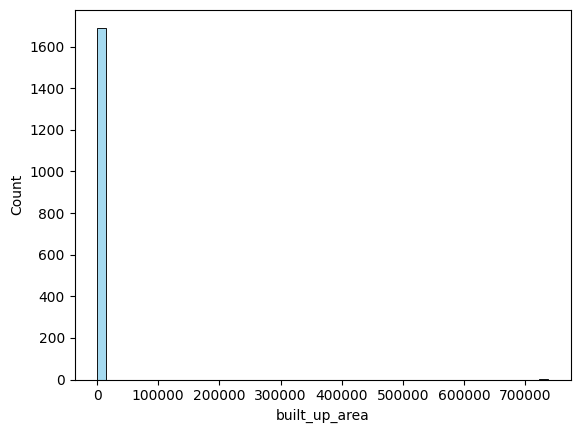

In [70]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

In [78]:
sns.boxplot(df['built_up_area'].dropna(), colorr='lightgreen')

KeyError: 0

In [80]:
print(df['built_up_area'].dropna())

1       4700.0
4        162.0
5       1630.0
6       3350.0
8        480.0
         ...  
3792    2726.0
3796    1845.0
3798     300.0
3800     900.0
3801     402.0
Name: built_up_area, Length: 1692, dtype: float64


In [83]:
built = df['built_up_area'].dropna()

In [86]:
print(df['built_up_area'].isnull().sum())  # Count missing values
cleaned_data = df['built_up_area'].dropna()
print(cleaned_data)  # Check the cleaned data


1989
1       4700.0
4        162.0
5       1630.0
6       3350.0
8        480.0
         ...  
3792    2726.0
3796    1845.0
3798     300.0
3800     900.0
3801     402.0
Name: built_up_area, Length: 1692, dtype: float64


Missing values in 'built_up_area': 1989


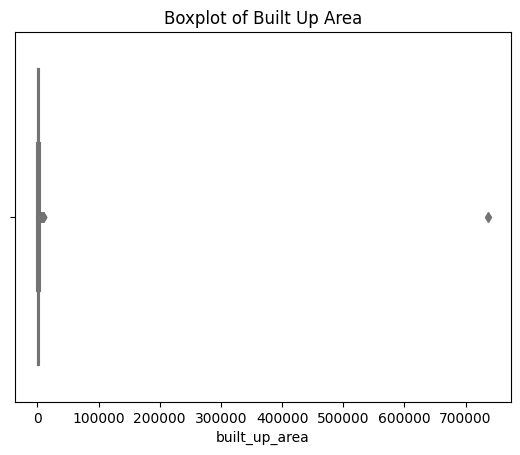

In [88]:

# Check for missing values in 'built_up_area'
missing_count = df['built_up_area'].isnull().sum()
print(f"Missing values in 'built_up_area': {missing_count}")

# Drop missing values and check the remaining data
cleaned_data = df['built_up_area'].dropna()

if cleaned_data.empty:
    print("No valid data available to plot.")
else:
    # Create the boxplot
    sns.boxplot(x=cleaned_data, color='lightgreen')  # Using 'x' to specify the data
    plt.title('Boxplot of Built Up Area')
    plt.show()  # Display the plot


In [94]:
df.iloc[:,20:26]

,study room,servant room,store room,pooja room,others,furnishing_type
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,2
3,0,0,0,0,0,0
4,0,0,1,1,0,2
...,...,...,...,...,...,...
3798,0,1,0,1,0,2
3799,0,1,0,0,0,0
3800,0,0,0,0,0,0
3801,0,0,0,0,1,2


### additional rooms

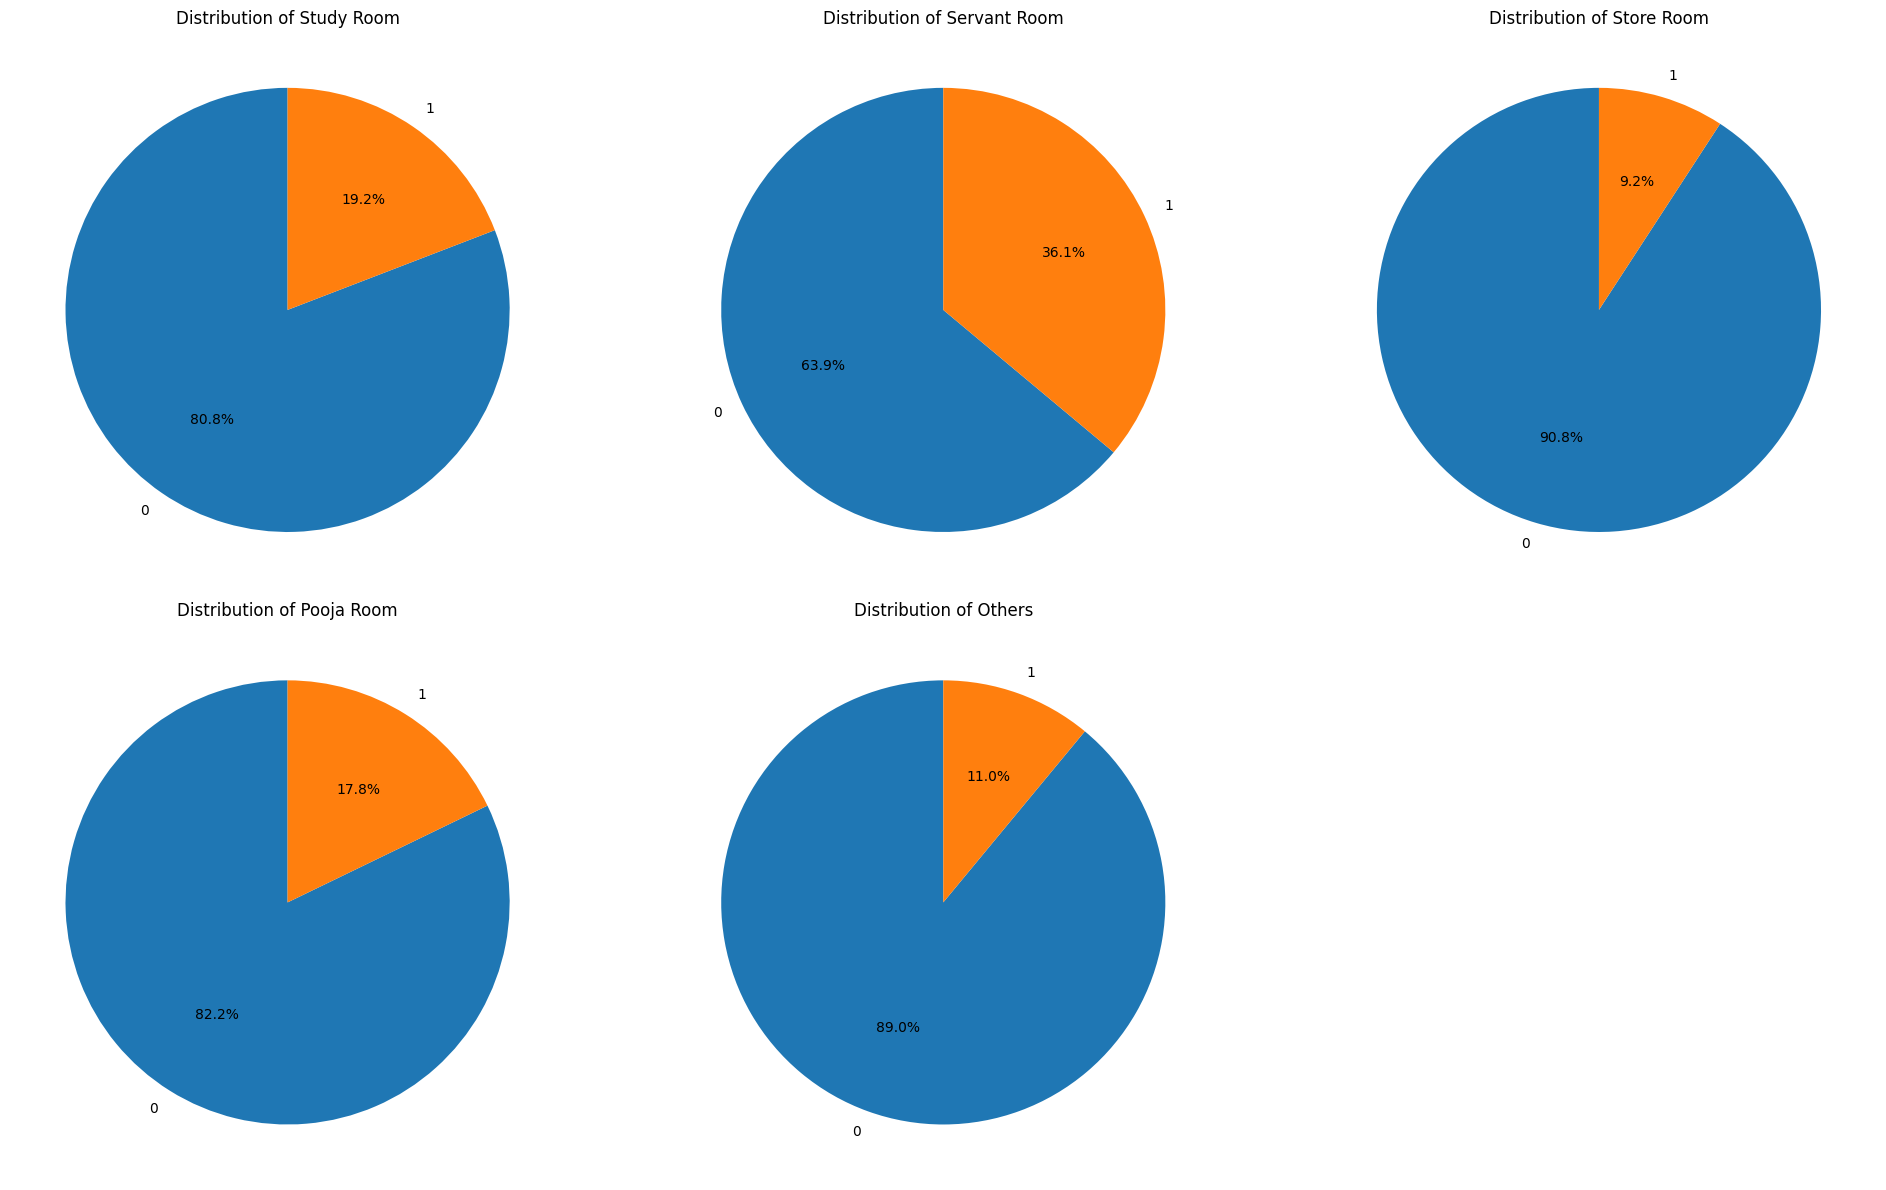

In [97]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [98]:
df['furnishing_type'].value_counts()

furnishing_type
0    2415
2    1059
1     207
Name: count, dtype: int64

<Axes: ylabel='count'>

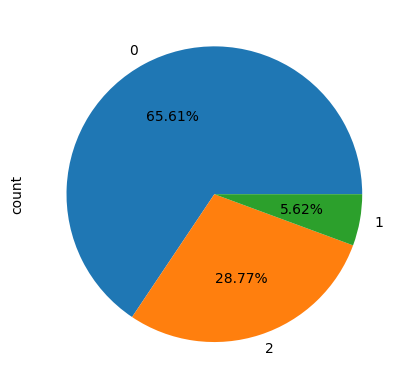

In [99]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [102]:
df.head(2)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61


### luxury score

In [100]:
df['luxury_score'].isnull().sum()

0

In [101]:
df['luxury_score'].describe()

count    3681.000000
mean       71.500136
std        53.031851
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

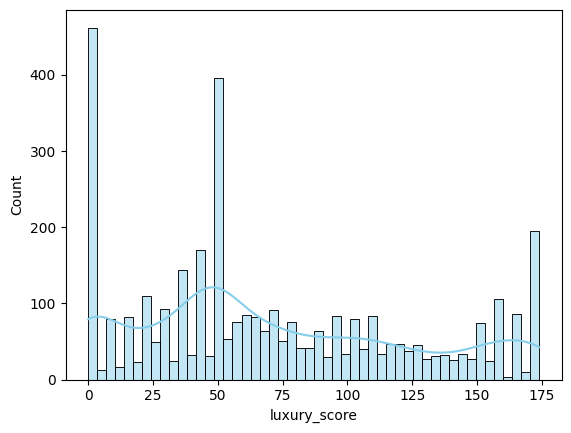

In [103]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

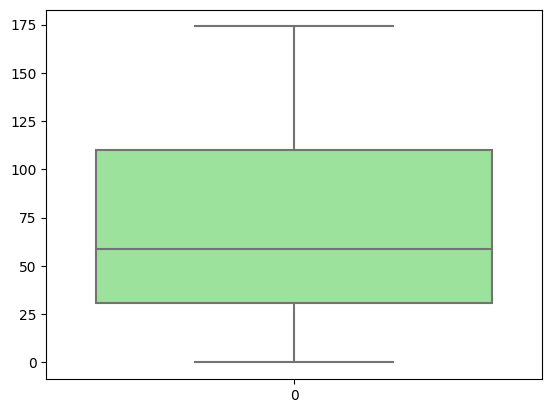

In [104]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.